# Creating the bag of words

In [7]:
import build_vocabulary as bv
import features_extraction as fe

voc = bv.get_vocabulary(path='../dataset/', numWords=5000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)

print(voc)

['aaron', 'abandoned', 'abc', 'abducted', 'able', 'aboard', 'abortion', 'about', 'abroad', 'absolute', 'absolutely', 'abu', 'abuse', 'abused', 'academy', 'accept', 'accepts', 'access', 'accessories', 'accident', 'accidentally', 'accidents', 'according', 'account', 'accounts', 'accurate', 'accurately', 'accusations', 'accused', 'accuses', 'aclu', 'acne', 'acquitted', 'across', 'act', 'action', 'activist', 'activists', 'activities', 'activity', 'actor', 'actors', 'actress', 'acts', 'actual', 'actually', 'adam', 'add', 'added', 'addict', 'addicted', 'addiction', 'addicts', 'address', 'addresses', 'adds', 'adele', 'adhd', 'administration', 'admit', 'admits', 'adopt', 'adopts', 'adorable', 'adorably', 'ads', 'adult', 'adults', 'advance', 'advances', 'advantage', 'advent', 'adventure', 'advertising', 'advice', 'adviser', 'advocates', 'affair', 'affairs', 'affect', 'affected', 'affects', 'affordable', 'afghan', 'afghanistan', 'afghans', 'africa', 'african', 'after', 'aftershock', 'again', 'ag

# Training a Naive Bayes classifier

In [2]:
import pvml

probs, prior = pvml.categorical_naive_bayes_train(X_train, Y_train)
predictions_train, score= pvml.categorical_naive_bayes_inference(
    X_train, probs, prior)
accuracy_train=(predictions_train==Y_train).mean()

predictions_validation, score = pvml.categorical_naive_bayes_inference(
    X_valid, probs, prior)
accuracy_validation=(predictions_validation==Y_valid).mean()
print('Train accuracy: ',accuracy_train*100)
print('Validation accuracy: ',accuracy_validation*100)

Train accuracy:  97.6
Validation accuracy:  96.575


# Finding the optimal dimension of the vocabulary

In [ ]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms
numWords = []
train_accuracy = []
validation_accuracy = []
validation_precision = []
for voc_dim in range(500, 10501, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    X_train, Y_train = fe.get_bow_representation(voc)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt')
    # Train the model and get the accuracy on the training and validation set
    probs, prior = pvml.categorical_naive_bayes_train(X_train, Y_train)

    predictions_train, score = pvml.categorical_naive_bayes_inference(
        X_train, probs, prior)
    accuracy_train = (predictions_train == Y_train).mean()

    predictions_validation, score = pvml.categorical_naive_bayes_inference(
        X_valid, probs, prior)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    true_positives, true_negatives, false_positives, false_negatives, precision = ms.calculate_metrics(
        Y_valid, predictions_validation)
    numWords.append(voc_dim)
    train_accuracy.append(accuracy_train*100)
    validation_accuracy.append(accuracy_validation*100)
    validation_precision.append(precision*100)

results = pd.DataFrame({'Vocabulary size': numWords, 'Train accuracy': train_accuracy,
                       'Validation accuracy': validation_accuracy, 'Validation precision': validation_precision})
results.to_csv('../data/naive_diff_voc_size.csv')

<Axes: title={'center': 'Naive Bayes with different vocabulary sizes'}, xlabel='Vocabulary size', ylabel='Accuracy (%)'>

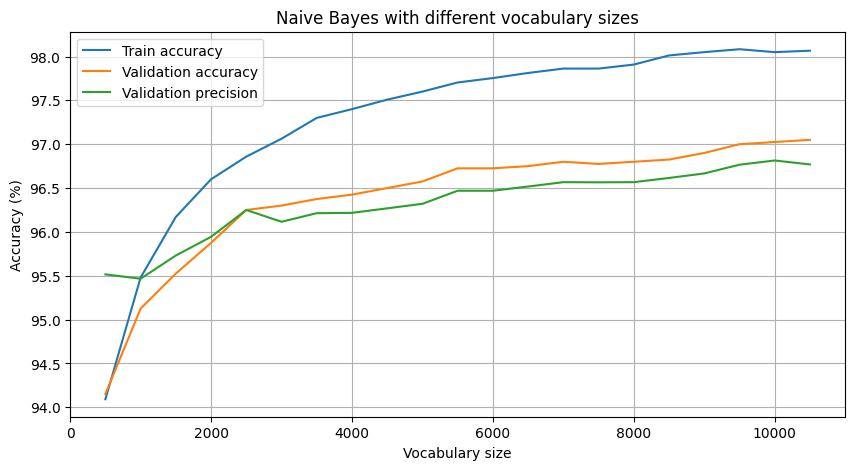

In [13]:
import pandas as pd

data = pd.read_csv('../data/naive_diff_voc_size.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.plot(kind='line', x='Vocabulary size', y=['Train accuracy', 'Validation accuracy', 'Validation precision'], figsize=(
    10, 5), grid=True, title='Naive Bayes with different vocabulary sizes',ylabel='Accuracy (%)')

# Naive bayes without common words 

In [ ]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms


words_to_ignore = []
f = open('../data/stopwords.txt', 'r')
n = 0
for w in f.read().split():
    words_to_ignore.append(w)
    n += 1
f.close()


numWords = []
train_accuracy = []
validation_accuracy = []
validation_precision = []
for voc_dim in range(500, 10501, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    voc_no_common_words = [word for word in voc if word not in words_to_ignore]

    X_train, Y_train = fe.get_bow_representation(voc_no_common_words)
    X_valid, Y_valid = fe.get_bow_representation(voc_no_common_words, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt')
    # Train the model and get the accuracy on the training and validation set
    probs, prior = pvml.categorical_naive_bayes_train(X_train, Y_train)

    predictions_train, score = pvml.categorical_naive_bayes_inference(
        X_train, probs, prior)
    accuracy_train = (predictions_train == Y_train).mean()

    predictions_validation, score = pvml.categorical_naive_bayes_inference(
        X_valid, probs, prior)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    true_positives, true_negatives, false_positives, false_negatives, precision = ms.calculate_metrics(
        Y_valid, predictions_validation)
    numWords.append(voc_dim)
    train_accuracy.append(accuracy_train*100)
    validation_accuracy.append(accuracy_validation*100)
    validation_precision.append(precision*100)

results = pd.DataFrame({'Vocabulary size': numWords, 'Train accuracy': train_accuracy,
                       'Validation accuracy': validation_accuracy, 'Validation precision': validation_precision})
results.to_csv('../data/naive_diff_voc_size_no_common_words.csv')

# Naive bayes with stemming

In [ ]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms
numWords = []
train_accuracy = []
validation_accuracy = []
validation_precision = []
for voc_dim in range(500, 10501, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    X_train, Y_train = fe.get_bow_representation(voc, stemming=True)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt', stemming=True)
    # Train the model and get the accuracy on the training and validation set
    probs, prior = pvml.categorical_naive_bayes_train(X_train, Y_train)

    predictions_train, score = pvml.categorical_naive_bayes_inference(
        X_train, probs, prior)
    accuracy_train = (predictions_train == Y_train).mean()

    predictions_validation, score = pvml.categorical_naive_bayes_inference(
        X_valid, probs, prior)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    true_positives, true_negatives, false_positives, false_negatives, precision = ms.calculate_metrics(
        Y_valid, predictions_validation)
    numWords.append(voc_dim)
    train_accuracy.append(accuracy_train*100)
    validation_accuracy.append(accuracy_validation*100)
    validation_precision.append(precision*100)

results = pd.DataFrame({'Vocabulary size': numWords, 'Train accuracy': train_accuracy,
                       'Validation accuracy': validation_accuracy, 'Validation precision': validation_precision})
results.to_csv('../data/naive_diff_voc_size_stemming.csv')

<Axes: title={'center': 'Precision of different features'}, xlabel='Vocabulary size', ylabel='Precision (%)'>

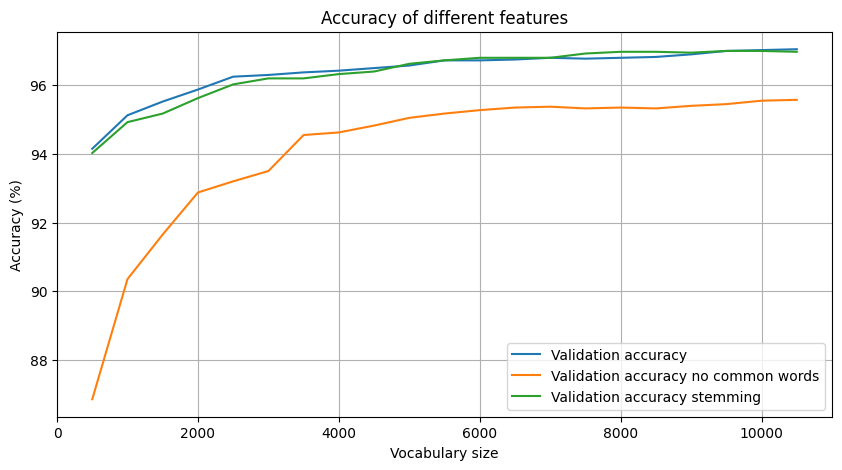

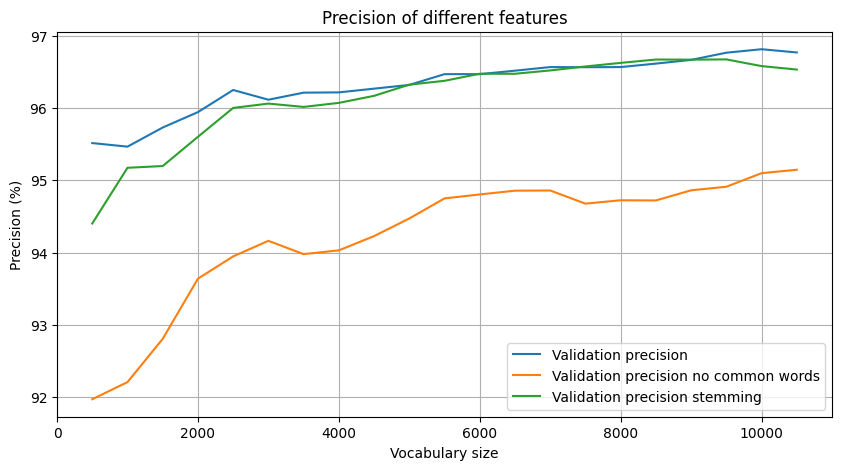

In [6]:
import pandas as pd

data = pd.read_csv('../data/naive_diff_voc_size.csv')
data_no_common = pd.read_csv('../data/naive_diff_voc_size_no_common_words.csv')
data_stemming = pd.read_csv('../data/naive_diff_voc_size_stemming.csv')
comparison = pd.DataFrame({'Vocabulary size': data['Vocabulary size'], 'Validation accuracy': data['Validation accuracy'],
                          'Validation accuracy no common words': data_no_common['Validation accuracy'],
                           'Validation accuracy stemming': data_stemming['Validation accuracy']})


comparison.plot(kind='line', x='Vocabulary size', y=[
                'Validation accuracy', 'Validation accuracy no common words', 'Validation accuracy stemming'], figsize=(10, 5), grid=True,
                title='Accuracy of different features', ylabel='Accuracy (%)')

comparison2 = pd.DataFrame({'Vocabulary size': data['Vocabulary size'], 'Validation precision': data['Validation precision'],
                           'Validation precision no common words': data_no_common['Validation precision'],
                            'Validation precision stemming': data_stemming['Validation precision']})
comparison2.plot(kind='line', x='Vocabulary size', y=[
                 'Validation precision', 'Validation precision no common words', 'Validation precision stemming'], figsize=(10, 5), grid=True,
                 title='Precision of different features', ylabel='Precision (%)')

# Training logistic Regression classifier

In [4]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd

voc = bv.get_vocabulary(path='../dataset/', numWords=5000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)

lambda_values = [0.0000001,0.0000003, 0.000001,0.000003, 0.00001,0.00003, 0.0001,0.0003,0.001,0.003]
validation_accuracy = []
validation_precision = []
train_accuracy = []


for lambdas in lambda_values:
    w, b = pvml.logreg_train(X_train, Y_train, lambda_=lambdas, lr=1e-3, steps=100000, init_w=None, init_b=0)
    
    P = pvml.logreg_inference(X_train, w, b)
    prediction = (P > 0.5)
    accuracy_train = (prediction == Y_train).mean()
    
    P = pvml.logreg_inference(X_valid, w, b)
    prediction = (P > 0.5)
    accuracy_validation = (prediction == Y_valid).mean()
    
    true_positives, true_negatives, false_positives, false_negatives, precision = ms.calculate_metrics(
        Y_valid, prediction)
    
    print('Lambda: ', lambdas)
    print('Accuracy: ', accuracy_train*100)
    
    validation_accuracy.append(accuracy_validation*100)
    validation_precision.append(precision*100)
    train_accuracy.append(accuracy_train*100)
    
results = pd.DataFrame({'Lambda': lambda_values, 'Validation accuracy': validation_accuracy, 'Validation precision': validation_precision})
results.to_csv('../data/logistic_diff_lambda.csv')  

KeyboardInterrupt: 